<a href="https://colab.research.google.com/github/ruksanasyed579/Playstore/blob/Project/Play_Store___Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Playstore App Review Analysis




##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Syed Ruksana

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -** https://github.com/ruksanasyed579/Playstore


Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [76]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [77]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
# Dataset First Look
play_store_ds_original=pd.read_csv('/content/drive/MyDrive/Project/Play Store Data.csv')
user_review_ds_original=pd.read_csv('/content/drive/MyDrive/Project/User Reviews.csv')
play_store_ds=play_store_ds_original.copy()
user_review_ds=user_review_ds_original.copy()

### Dataset First View

In [79]:
play_store_ds.head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


### Dataset Rows & Columns count

In [80]:
# Dataset Rows & Columns count

print(f"Number Of Rows : {play_store_ds.shape[0]}")
print(f"Number Of Columns : {play_store_ds.shape[1]}")

Number Of Rows : 10841
Number Of Columns : 13


### Dataset Information

In [81]:
# Dataset Info
play_store_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [82]:
# Dataset Duplicate Value Count
num_dup=play_store_ds.duplicated().sum()
print(f'Duplicated Value Count {num_dup}')

Duplicated Value Count 483


#### Missing Values/Null Values

In [83]:
# Missing Values/Null Values Count
num_missing=play_store_ds.isna().sum()
print(f'Missing Values/Null Values Count {num_missing}')

Missing Values/Null Values Count App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

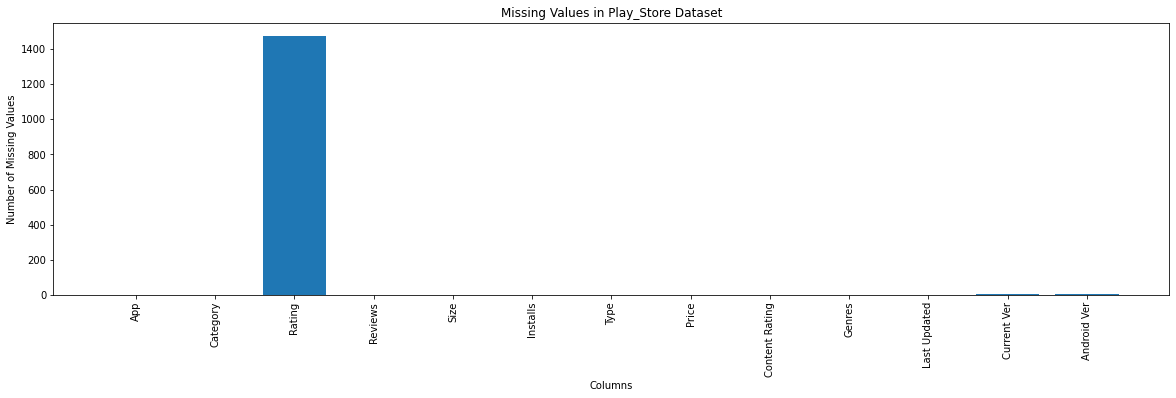

In [84]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (20, 5)
#Creating a plot
plt.bar(num_missing.index,num_missing.values)
# setting the chart title and axis labels
plt.title('Missing Values in Play_Store Dataset')
plt.xlabel('Columns' )
plt.ylabel('Number of Missing Values')
#setting columns on vertica veiw
plt.xticks(rotation='vertical')

## ***2. Understanding Your Variables***

In [85]:
# Dataset Columns
list(play_store_ds.columns)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [86]:
# Dataset Describe
play_store_ds.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### What did you know about your dataset?

1.Family has highest frequency in Category attribute,

2.Varies with device has highest frequency in size attribute,

3.Tools has highest frequency in Genres attribute,

4.August 3, 2018 has highest frequency in Last Updated attribute,

5.Varies with device has highest frequency in Current Ver attribute,


### Variables Description 

**COLUMN NAMES OF PLAY STORE DATA**

App- Name of the apps.

Category- Category under which the app falls.

Rating- Applications rating in playstore.

Reviews- Number of reviews given to apps.

Size- Size of the apps.

Installs- Number of installs of the apps.

Type- app is free or paid.

Price- Price of the apps.

Content Rating - Appropriate target audience of the apps.

Genres- Genres under which the app fall.

Last updated- Date when the app last updated.

Current Ver- Current version of the apps.

Android Ver- The Android operating system the app is compatible with.



### Check Unique Values for each variable.

In [87]:
# Check Unique Values for each variable.
for column in play_store_ds.columns:
  unique_values=play_store_ds[column].nunique()
  print(f"Unique values for {column}: {unique_values}")

Unique values for App: 9660
Unique values for Category: 34
Unique values for Rating: 40
Unique values for Reviews: 6002
Unique values for Size: 462
Unique values for Installs: 22
Unique values for Type: 3
Unique values for Price: 93
Unique values for Content Rating: 6
Unique values for Genres: 120
Unique values for Last Updated: 1378
Unique values for Current Ver: 2832
Unique values for Android Ver: 33


In [88]:
play_store_ds.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up



### ***Lets Explore User Review DataSet***


In [89]:
#first veiw of dataset
user_review_ds.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [90]:
# To Check Shape of DataSet

print(f"There are total {user_review_ds.shape[0]} rows and {user_review_ds.shape[1]} columns")

There are total 64295 rows and 5 columns


In [91]:
# To check how many unique apps are there in Dataset
user_review_ds['App'].nunique() 

1074

In [92]:
# droping all null values from User_review_ds

user_review_ds1=user_review_ds.drop_duplicates()
user_review_ds1.shape


(30679, 5)




## 3. ***Data Wrangling***

In [93]:
# Write your code to make your dataset analysis ready.
# Dropping Duplicate
play_store_ds=play_store_ds.drop_duplicates(subset='App')
play_store_ds

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [94]:
#Droping null values
play_store_ds=play_store_ds.dropna()
play_store_ds

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [95]:
#count of null values in Price column
play_store_ds['Price'].isnull().sum()


0

In [96]:
play_store_ds['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [97]:
#removing unnecessary characters and save as play_store_data2
play_store_ds=play_store_ds.replace('[+,$]','',regex=True )
play_store_ds.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,January 7 2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,January 15 2018,2.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,August 1 2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,June 8 2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,June 20 2018,1.1,4.4 and up


In [98]:
#Sorting Price 
play_store_ds['Price'] = play_store_ds['Price'].astype('float64')
play_store_ds['Price'].dtype


dtype('float64')

In [99]:
play_store_ds[["App","Price"]].sort_values(by="Price",ascending = False)


,App,Price
4367,I'm Rich - Trump Edition,400.00
4197,most expensive app (H),399.99
5356,I Am Rich Premium,399.99
4362,💎 I'm rich,399.99
5351,I am rich,399.99
...,...,...
3648,Klart.se - Sweden's best weather,0.00
3647,The Weather Network,0.00
3646,Yahoo! Weather for SH Forecast for understandi...,0.00
3645,Rainfall radar - weather,0.00


In [100]:
#Convert all size to KB so Each M have to Multiply with 1024
#Removing "M", Changing Size To KB
play_store_ds['Size'] = play_store_ds['Size'].map(
    lambda value :
        str(int(float(value.rstrip('M')) * 1024)) if value[-1] == 'M' else value
)

# Removing "k"
play_store_ds['Size'] = play_store_ds['Size'].map(
    lambda value :
        str(value.rstrip('k')) if value[-1] == 'k' else value
)

# Setting "Varies with device" to NaN
play_store_ds['Size'] = play_store_ds['Size'].map(
    lambda value :
        np.nan if value == 'Varies with device' else value
)

In [101]:
play_store_ds['Size'].unique()

array(['19456', '14336', '8908', '25600', '2867', '5734', '29696',
       '33792', '3174', '28672', '12288', '20480', '21504', '37888',
       '5632', '17408', '39936', '31744', '4300', '23552', '6144', '6246',
       '4710', '9420', '5324', '11264', '24576', nan, '9625', '15360',
       '10240', '1228', '26624', '8192', '8089', '57344', '58368',
       '35840', '55296', '201', '3686', '5836', '8806', '2457', '27648',
       '2764', '2560', '7168', '16384', '3481', '9113', '3993', '2969',
       '38912', '32768', '5529', '18432', '1126', '2252', '4608', '10035',
       '53248', '9216', '6860', '30720', '2662', '7270', '22528', '6553',
       '3276', '8396', '5017', '9728', '5120', '6041', '13312', '74752',
       '6963', '3584', '4096', '2355', '2150', '43008', '9318', '56320',
       '23', '7475', '6656', '1536', '7680', '52224', '41984', '49152',
       '8704', '47104', '8499', '4403', '4812', '3379', '40960', '7987',
       '9011', '6758', '5222', '62464', '67584', '79', '8601', '37

In [102]:
# converting Size column from object to float datatype
play_store_ds['Size']=play_store_ds['Size'].astype('float64')
play_store_ds

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,January 7 2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,January 15 2018,2.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8908.0,5000000,Free,0.0,Everyone,Art & Design,August 1 2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,June 8 2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.0,100000,Free,0.0,Everyone,Art & Design;Creativity,June 20 2018,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2662.0,500,Free,0.0,Everyone,Education,June 18 2017,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,July 25 2017,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.0,100,Free,0.0,Everyone,Education,July 6 2018,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17,Books & Reference,January 19 2015,Varies with device,Varies with device


In [103]:
#changing Datatype of Installs column
play_store_ds['Installs']=play_store_ds['Installs'].astype('int')
play_store_ds['Installs'].dtype

dtype('int64')

In [104]:
play_store_ds['Installs'].sort_values(ascending=True).value_counts()

1000000       1414
100000        1094
10000          986
10000000       937
1000           696
5000000        607
500000         503
50000          456
5000           424
100            303
50000000       202
500            199
100000000      188
10              69
50              56
500000000       24
1000000000      20
5                9
1                3
Name: Installs, dtype: int64

In [105]:
#Content Rating Operation

play_store_ds['Content Rating'].value_counts()

Everyone          6612
Teen               912
Mature 17          357
Everyone 10        305
Adults only 18       3
Unrated              1
Name: Content Rating, dtype: int64

In [106]:
# Checking is there null values
play_store_ds['Content Rating'].isnull().sum()

0

In [107]:
play_store_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   object 
 4   Size            7021 non-null   float64
 5   Installs        8190 non-null   int64  
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   float64
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 895.8+ KB


In [108]:
# Genre column Operations
play_store_ds['Genres'].isna().sum()

0

In [109]:
#Andriod Version column operations
AndroidVer_count=pd.value_counts(play_store_ds["Android Ver"], sort=True)


In [110]:
play_store_ds['Genres'].value_counts()

Tools                          716
Entertainment                  471
Education                      429
Finance                        302
Productivity                   301
                              ... 
Health & Fitness;Education       1
Music & Audio;Music & Video      1
Arcade;Pretend Play              1
Art & Design;Pretend Play        1
Strategy;Creativity              1
Name: Genres, Length: 114, dtype: int64

### What all manipulations have you done and insights you found?

1.Deleted Duplicates from Playstore in App coloumn

2.Drop all Null values(null values count=1470)

3.Removed unnessery symbol like - $,+

4.Changing the price datatype from Object to float64

5.Converted Size from MB to all KB , and covert it as float64

6.There are 20 app which has been install 1000000000 users 

6.Taken Value_counts() of Content Rating column, 6612 Everyone has the content

7.Taken Value_counts() of Genres Column, Tool Genres has 716 users which hightest of the dataset

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Free app V/S Paid apps  -  Pie Chart


Text(0.5, 1.0, 'Free  v/s  Paid')

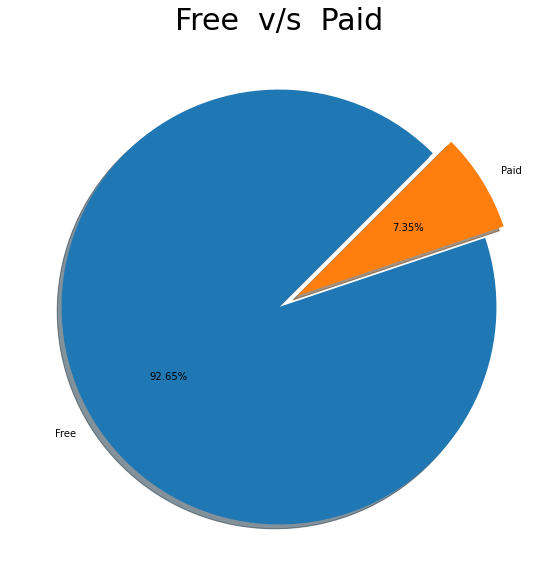

In [111]:
# Chart - 1 visualization code
plt.figure(figsize=(15,10))
x=play_store_ds.Type.value_counts()
label=["Free","Paid"]
plt.pie(x,labels=label,autopct="%1.2f%%",shadow=True,explode=[ 0, 0.1],startangle=45,)
plt.title("Free  v/s  Paid", fontsize=30)


##### 1. Why did you pick the specific chart?


Because, A pie plot is a proportional representation of the numerical data in a column.

##### 2. What is/are the insight(s) found from the chart?

There are 7.35% paid Apps in our dataset and 92.65% Free Apps



## Distribution of Content Raing - Bar Chart - 2

In [112]:
# Chart - 2 visualization code
content=play_store_ds['Content Rating'].value_counts()
content

Everyone          6612
Teen               912
Mature 17          357
Everyone 10        305
Adults only 18       3
Unrated              1
Name: Content Rating, dtype: int64

Text(0, 0.5, 'No.Of Users')

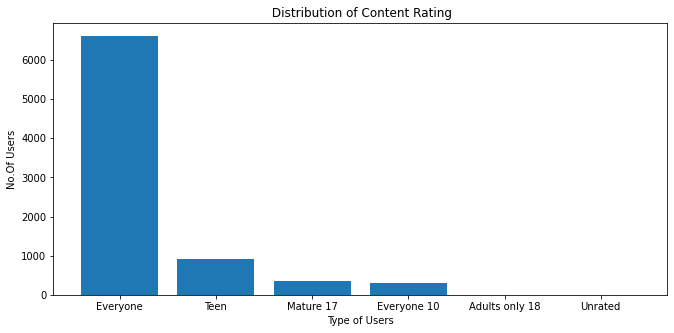

In [113]:
plt.figure(figsize=(11,5))
# Creating Bar chart
plt.bar(content.index, content.values)

plt.title(' Distribution of Content Rating')
plt.xlabel('Type of Users')
plt.ylabel('No.Of Users')

##### 1. Why did you pick the specific chart?

Because, The bar plots can be plotted horizontally or vertically. A bar chart describes the comparisons between the discrete categories

##### 2. What is/are the insight(s) found from the chart?

Content is Rating by user as below
Everyone        -   6612

Teen            -    912

Mature 17       -    357

Everyone 10     -   305

Adults only 18  -    3

Unrated         -    1

We can say that 6612 apps are rated by everyone, secondly Teen are rating apps most

#### **Genres wise apps in playstore**- 3

In [114]:
# Chart - 3 visualization code

y = play_store_ds['Genres'].value_counts().index
x = play_store_ds['Genres'].value_counts().head(10)
X = []
Y= []
for i in range(len(x)):
    X.append(x[i])
    Y.append(y[i])



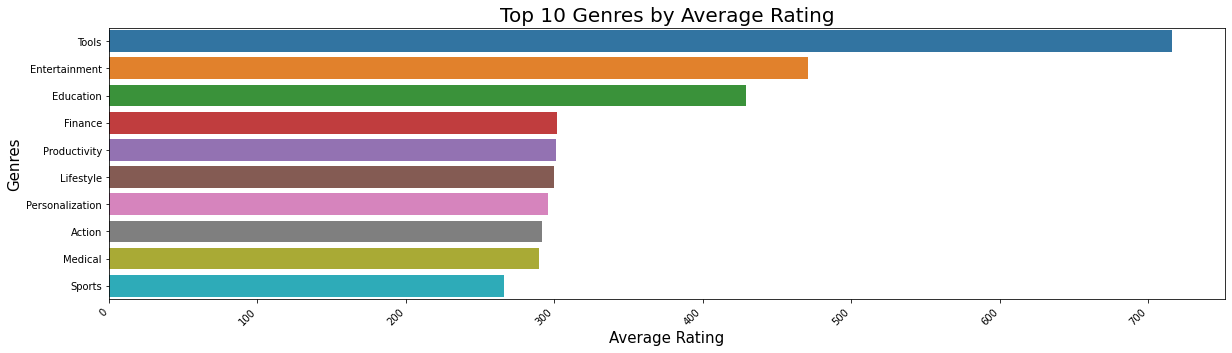

In [115]:
#Visualizating top generes

sns.barplot(x=X, y=Y)
plt.title('Top 10 Genres by Average Rating', fontsize=20)
plt.ylabel("Genres",fontsize=15)
plt.xlabel('Average Rating', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Which Android Version Supported the Apps- 4

In [116]:
# Chart - 4 visualization code
AndroidVer_count.value_counts()

1       3
2       3
5       2
1141    1
3       1
7       1
8       1
15      1
16      1
27      1
31      1
41      1
42      1
1811    1
112     1
185     1
201     1
203     1
232     1
315     1
447     1
547     1
713     1
947     1
1040    1
87      1
Name: Android Ver, dtype: int64

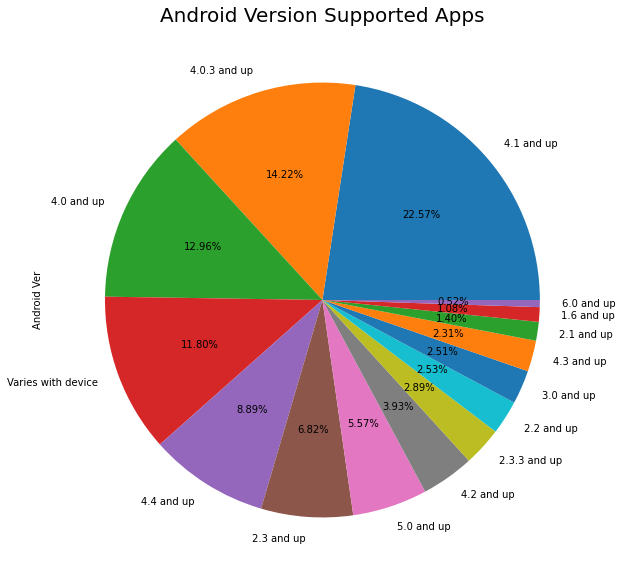

In [117]:
plt.figure(figsize=(20,10))
AndroidVer_count.head(15).plot(kind='pie',autopct='%1.02f%%')
plt.title('Android Version Supported Apps',size=20)
plt.show()

##### 1. Why did you pick the specific chart?

Because, A pie chart helps organize and show data as a percentage of a whole. True to the name, this kind of visualization uses a circle to represent the whole, and slices of that circle, or “pie”, to represent the specific categories that compose the whole.

##### 2. What is/are the insight(s) found from the chart?

More than 60% Apps supports 4.0 and above versions

#### **Frequency of Apps in each category**

In [134]:
# Chart - 5 visualization code
cat=play_store_ds['Category'].value_counts()
cat

FAMILY                 1607
GAME                    912
TOOLS                   717
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         296
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       63
HOUSE_AND_HOME           62
ART_AND_DESIGN           60
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'frequency of app in each categories ')

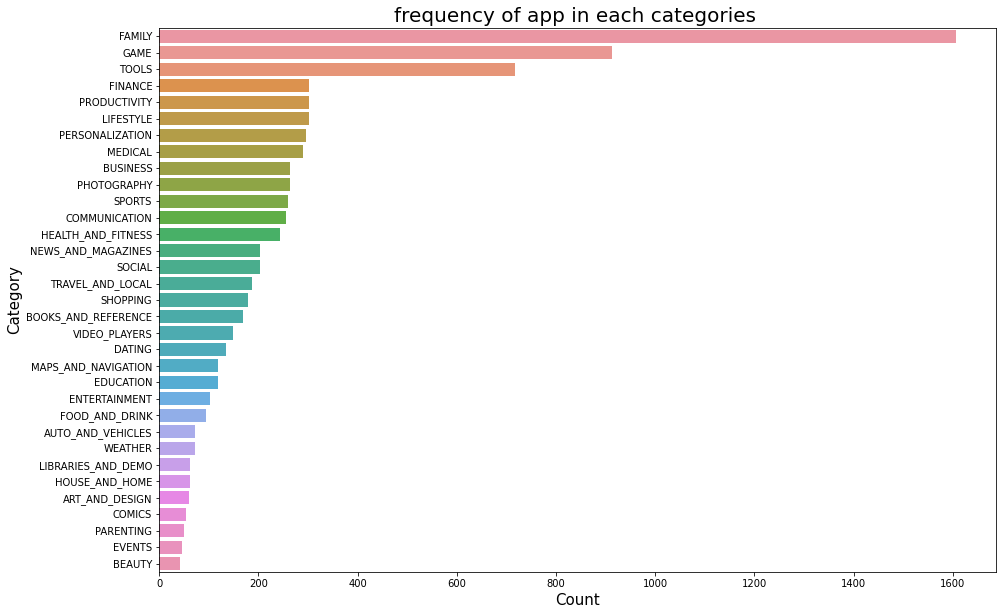

In [143]:
plt.figure(figsize=(15,10))
sns.barplot(cat.values, cat.index)
plt.xlabel("Count",fontsize=15)
plt.ylabel("Category",fontsize=15)
plt.title("frequency of app in each categories ", fontsize = 20)

##### 1. Why did you pick the specific chart?



Because,A bar chart places the separate values of the data on the x-axis and the height of the bar indicates the count of that category.

##### 2. What is/are the insight(s) found from the chart?

Most of the apps on play Store belongs to family catagory

#### Chart - 6

In [119]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [124]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [127]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [128]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***